In [99]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### Load the Data

In [21]:
iris_df = pd.read_csv('C:\\Users\\DELL\\Desktop\\Tasks\\Task 3\\IRIS.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### understanding the Data

In [77]:
iris_df.shape

(147, 5)

In [22]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [23]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Data Cleaning

In [24]:
iris_df[iris_df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [25]:
iris_df.drop_duplicates(inplace= True)

In [26]:
iris_df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
label_encoding = preprocessing.LabelEncoder()
iris_df['species'] = label_encoding.fit_transform(iris_df['species'])
iris_df['species'].unique()

array([0, 1, 2])

#### Exploratory Data Analysis(EDA)

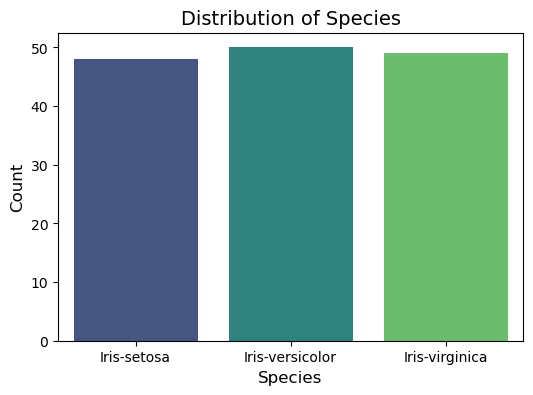

In [41]:
plt.figure(figsize = (6, 4))
sb.countplot(data = iris_df, x = 'species', palette='viridis')

plt.title('Distribution of Species', fontsize = 14)
plt.xlabel('Species', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks([0, 1, 2],['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

plt.show()

In [49]:
fig = px.histogram(iris_df, x = 'sepal_width', y = 'sepal_length', 
                   title = 'Distribution of Sepal', color_discrete_sequence= ['#20a007'])
fig.update_layout(
    xaxis_title = 'sepal_width',
    yaxis_title = 'sepal_length',
    bargap=0.05,             
    showlegend=False,   
)
fig.show()

In [51]:
fig = px.histogram(iris_df, x = 'petal_width', y = 'petal_length', 
                   title = 'Distribution of Petal', color_discrete_sequence= ['#20a007'])
fig.update_layout(
    xaxis_title = 'petal_width',
    yaxis_title = 'petal_length',
    bargap=0.05,             
    showlegend=False,   
)
fig.show()

In [73]:
fig = px.histogram(iris_df, x = 'sepal_width', y = 'sepal_length', 
                   title = 'Distribution of Sepal with Species', color = 'species')

fig.update_traces(marker=dict(opacity=0.5))

fig.update_layout(
    xaxis_title = 'sepal_width',
    yaxis_title = 'sepal_length',
    bargap=0.05,             
    showlegend=True,  
    legend=dict(
        title='Species',  
        x=1.05, 
        y=1,  
    ),
)
fig.show()

In [71]:
fig = px.histogram(iris_df, x = 'petal_width', y = 'petal_length', 
                   title = 'Distribution of Petal with Species', color = 'species')

fig.update_traces(marker=dict(opacity=0.5))

fig.update_layout(
    xaxis_title = 'petal_width',
    yaxis_title = 'petal_length',
    bargap=0.05,             
    showlegend=True,  
    legend=dict(
        title='Species',  
        x=1.05, 
        y=1,  
    ),
)
fig.show()

#### Data preprocessing

#### 1. Feature Engineering

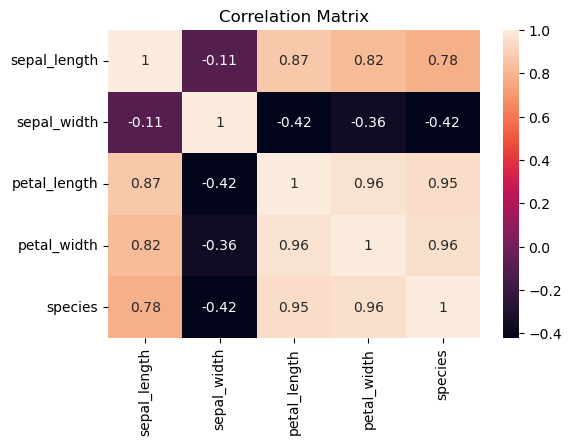

In [74]:
plt.figure(figsize = (6, 4))
sb.heatmap(iris_df.corr(), annot = True)
plt.title("Correlation Matrix")
plt.show()

In [75]:
X = iris_df.drop('species', axis = 1)
y = iris_df['species']
X.shape

(147, 4)

#### 2. Splitting into training and testing

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(117, 4)
(117,)
(30, 4)
(30,)


In [81]:
# Standardize features (not necessary for decision trees and random forest, but recommended for KNN)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#### Model

In [86]:
# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
logistic_predictions = logistic_regression.predict(x_test)

In [87]:
# Decision Trees
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
decision_tree_predictions = decision_tree_model.predict(x_test)

In [88]:
# Random Forest 
random_forest_model = RandomForestClassifier(n_estimators= 100)
random_forest_model.fit(x_train, y_train)
random_forest_predictions = random_forest_model.predict(x_test)

In [89]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)

#### Evaluate the model

In [90]:
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 0.9333333333333333
Random Forest Accuracy: 0.9666666666666667
K-Nearest Neighbors Accuracy: 0.9666666666666667


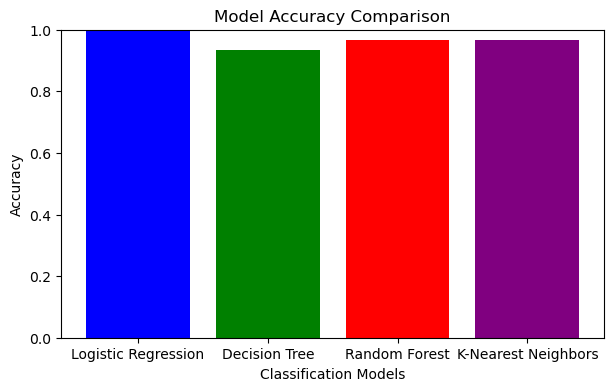

In [98]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']

accuracies = [logistic_accuracy, decision_tree_accuracy, random_forest_accuracy, knn_accuracy]

plt.figure(figsize=(7, 4))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.0, 1.0) 
plt.show()

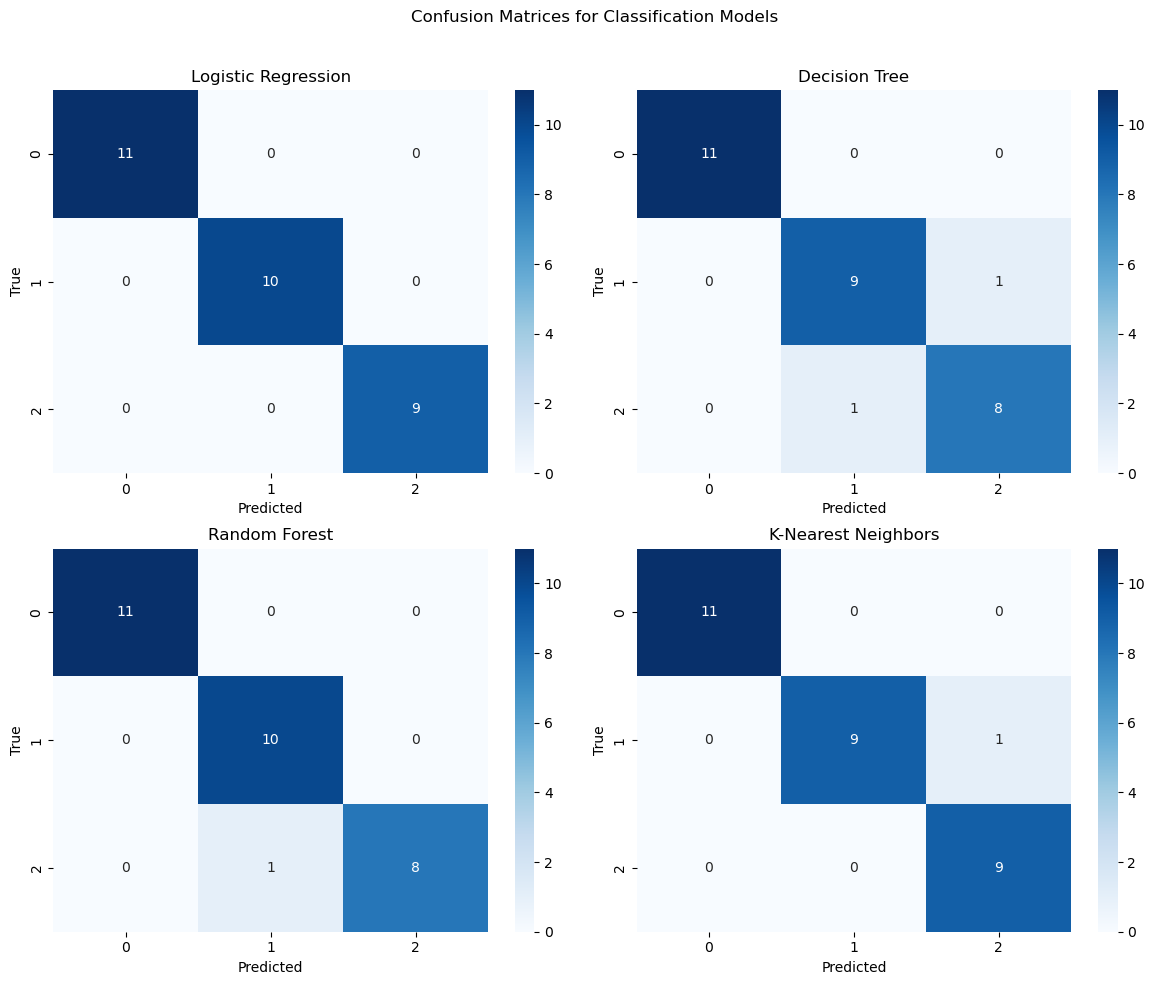

In [118]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
predictions = [logistic_predictions, decision_tree_predictions, random_forest_predictions, knn_predictions]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Confusion Matrices for Classification Models')

for i, ax in enumerate(axes.ravel()):
    cm = confusion_matrix(y_test, predictions[i])
    sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(models[i])

plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.show()


#### Model Testing

In [125]:
data = {
    'sepal_length': [5.1],
    'sepal_width': [3.5],
    'petal_length': [1.4],
    'petal_width': [0.2]
}

dummy_df = pd.DataFrame(data)
print("Logistic Regression Prediction:", logistic_regression.predict(dummy_df))
print("Decision Tree Prediction:", decision_tree_model.predict(dummy_df))
print("Random Forest Prediction:", random_forest_model.predict(dummy_df))
print("K-Nearest Neighbors Prediction:", knn_model.predict(dummy_df))

Logistic Regression Prediction: [1]
Decision Tree Prediction: [2]
Random Forest Prediction: [2]
K-Nearest Neighbors Prediction: [2]
